In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('EORIC_AWS_Weather_Data_2019_12_12.csv',parse_dates=['Date'])

In [3]:
df.head()

,Line#,Date,Time,speed,Pressure,Rain,Humidity,dew,solar,water,wind dir,wind speed,Temperature
0,1,2017-02-16,3:00:00 PM,4.2,976.8,0.0,42.0,19.61,444,0.0933,154,1.1,34.36
1,2,2017-02-16,3:30:00 PM,4.9,976.5,0.0,40.0,19.16,338,0.0933,45,1.1,34.73
2,3,2017-02-16,4:00:00 PM,4.6,976.2,0.0,39.4,18.61,109,0.0933,45,1.1,34.39
3,4,2017-02-16,4:30:00 PM,4.2,976.1,0.0,40.0,18.92,126,0.0933,46,0.8,34.47
4,5,2017-02-16,5:00:00 PM,3.4,976.2,0.0,39.1,18.63,84,0.0925,100,0.8,34.55


In [4]:
df.drop(['Rain','dew','solar','wind speed'],axis=1,inplace=True)

In [5]:
df.head()

,Line#,Date,Time,speed,Pressure,Humidity,water,wind dir,Temperature
0,1,2017-02-16,3:00:00 PM,4.2,976.8,42.0,0.0933,154,34.36
1,2,2017-02-16,3:30:00 PM,4.9,976.5,40.0,0.0933,45,34.73
2,3,2017-02-16,4:00:00 PM,4.6,976.2,39.4,0.0933,45,34.39
3,4,2017-02-16,4:30:00 PM,4.2,976.1,40.0,0.0933,46,34.47
4,5,2017-02-16,5:00:00 PM,3.4,976.2,39.1,0.0925,100,34.55


In [6]:
df.isnull().sum()

Line#             0
Date              0
Time              0
speed             0
Pressure          0
Humidity          0
water             0
wind dir          0
Temperature    9402
dtype: int64

In [7]:
df.replace('[A-Za-z]','',regex=True,inplace=True)

In [8]:
df.head(10)

,Line#,Date,Time,speed,Pressure,Humidity,water,wind dir,Temperature
0,1,2017-02-16,3:00:00,4.2,976.8,42.0,0.0933,154,34.36
1,2,2017-02-16,3:30:00,4.9,976.5,40.0,0.0933,45,34.73
2,3,2017-02-16,4:00:00,4.6,976.2,39.4,0.0933,45,34.39
3,4,2017-02-16,4:30:00,4.2,976.1,40.0,0.0933,46,34.47
4,5,2017-02-16,5:00:00,3.4,976.2,39.1,0.0925,100,34.55
5,6,2017-02-16,5:30:00,3.0,976.4,37.8,0.0925,108,34.47
6,7,2017-02-16,6:00:00,4.2,976.5,38.0,0.0918,108,33.63
7,8,2017-02-16,6:30:00,0.8,976.8,40.3,0.0918,117,32.07
8,9,2017-02-16,7:00:00,0.0,977.0,43.5,0.0911,136,31.15
9,10,2017-02-16,7:30:00,0.0,977.4,44.8,0.0904,136,30.65


In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.replace(0,np.nan,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34177 entries, 0 to 36608
Data columns (total 9 columns):
Line#          34177 non-null int64
Date           34177 non-null datetime64[ns]
Time           34177 non-null object
speed          30160 non-null float64
Pressure       34177 non-null float64
Humidity       34177 non-null float64
water          34177 non-null float64
wind dir       34152 non-null float64
Temperature    34177 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.6+ MB


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [13]:
imputer = SimpleImputer(missing_values=np.nan,
    strategy='median')

In [14]:
df.drop(['water','wind dir'],axis=1,inplace=True)

In [15]:
flot_col = [cols for cols in df.columns if df[cols].dtype == 'float64']

In [16]:
flot_col

['speed', 'Pressure', 'Humidity', 'Temperature']

In [17]:
df[flot_col]= imputer.fit_transform(df[flot_col])

In [18]:
df[flot_col].isnull().sum()

speed          0
Pressure       0
Humidity       0
Temperature    0
dtype: int64

In [19]:
df.drop('Line#',axis=True,inplace=True)

In [20]:
df.head()

,Date,Time,speed,Pressure,Humidity,Temperature
0,2017-02-16,3:00:00,4.2,976.8,42.0,34.36
1,2017-02-16,3:30:00,4.9,976.5,40.0,34.73
2,2017-02-16,4:00:00,4.6,976.2,39.4,34.39
3,2017-02-16,4:30:00,4.2,976.1,40.0,34.47
4,2017-02-16,5:00:00,3.4,976.2,39.1,34.55


In [21]:
new_date =[]
new_time =[]
for i in range(len(df)):
    if(i % 2 ==0):
        continue
    else:
        new_date.append(df.iloc[i]['Date'])
        new_time.append(df.iloc[i]['Time'])

In [22]:
new_temp = []
new_windspeed=[]
new_pres=[]
new_humid=[]
for i in range(len(df)):
    if(i % 2 ==0):
        continue
    else:
        new_pres.append((df.iloc[i]['Pressure']+df.iloc[i+1]['Pressure'])/2)
        new_temp.append((df.iloc[i]['Temperature']+df.iloc[i+1]['Temperature'])/2)
        new_windspeed.append((df.iloc[i]['speed']+df.iloc[i+1]['speed'])/2)
        new_humid.append((df.iloc[i]['Humidity']+df.iloc[i+1]['Humidity'])/2)

In [23]:
newData = pd.DataFrame({'Date':new_date,
                          'Time':new_time,
                          'windSpeed':new_windspeed,
                          'Pressure':new_pres,
                          'Temperature':new_temp,
                          'Hourly RH':new_humid
                          })

In [24]:
newData.head()

,Date,Time,windSpeed,Pressure,Temperature,Hourly RH
0,2017-02-16,3:30:00,4.75,976.35,34.56,39.70
1,2017-02-16,4:30:00,3.80,976.15,34.51,39.55
2,2017-02-16,5:30:00,3.60,976.45,34.05,37.90
3,2017-02-16,6:30:00,2.30,976.90,31.61,41.90
4,2017-02-16,7:30:00,3.80,977.75,30.47,44.50


In [25]:
newData['Time']= pd.to_datetime(newData.Time)

In [26]:
newData.head()

,Date,Time,windSpeed,Pressure,Temperature,Hourly RH
0,2017-02-16,2020-09-10 03:30:00,4.75,976.35,34.56,39.70
1,2017-02-16,2020-09-10 04:30:00,3.80,976.15,34.51,39.55
2,2017-02-16,2020-09-10 05:30:00,3.60,976.45,34.05,37.90
3,2017-02-16,2020-09-10 06:30:00,2.30,976.90,31.61,41.90
4,2017-02-16,2020-09-10 07:30:00,3.80,977.75,30.47,44.50


In [27]:
newData['Month'] = newData['Date'].dt.month
newData['Day'] = newData['Date'].dt.day
newData['Hour'] = newData['Time'].dt.hour

In [28]:
newData.head(10)

,Date,Time,windSpeed,Pressure,Temperature,Hourly RH,Month,Day,Hour
0,2017-02-16,2020-09-10 03:30:00,4.75,976.35,34.560,39.70,2,16,3
1,2017-02-16,2020-09-10 04:30:00,3.80,976.15,34.510,39.55,2,16,4
2,2017-02-16,2020-09-10 05:30:00,3.60,976.45,34.050,37.90,2,16,5
3,2017-02-16,2020-09-10 06:30:00,2.30,976.90,31.610,41.90,2,16,6
4,2017-02-16,2020-09-10 07:30:00,3.80,977.75,30.470,44.50,2,16,7
5,2017-02-16,2020-09-10 08:30:00,2.10,978.75,30.220,43.85,2,16,8
6,2017-02-16,2020-09-10 09:30:00,2.10,979.60,29.435,44.70,2,16,9
7,2017-02-16,2020-09-10 10:30:00,4.55,980.00,29.245,44.35,2,16,10
8,2017-02-16,2020-09-10 11:30:00,4.00,980.15,27.175,68.35,2,16,11
9,2017-02-17,2020-09-10 12:30:00,3.05,979.85,26.550,76.90,2,17,12


In [29]:
newData.drop(['Date','Time'],axis=1,inplace=True)

In [30]:
newData.head()

,windSpeed,Pressure,Temperature,Hourly RH,Month,Day,Hour
0,4.75,976.35,34.56,39.70,2,16,3
1,3.80,976.15,34.51,39.55,2,16,4
2,3.60,976.45,34.05,37.90,2,16,5
3,2.30,976.90,31.61,41.90,2,16,6
4,3.80,977.75,30.47,44.50,2,16,7


In [31]:
cols = [
 'Month',
 'Day',
 'Hour',
 'windSpeed',
 'Pressure',
 'Temperature',
 'Hourly RH']

In [32]:
newData = newData[cols]

In [33]:
newData.head()

,Month,Day,Hour,windSpeed,Pressure,Temperature,Hourly RH
0,2,16,3,4.75,976.35,34.56,39.70
1,2,16,4,3.80,976.15,34.51,39.55
2,2,16,5,3.60,976.45,34.05,37.90
3,2,16,6,2.30,976.90,31.61,41.90
4,2,16,7,3.80,977.75,30.47,44.50


In [34]:
newData['Month'] = newData['Month'].astype('float64')
newData['Day'] = newData['Day'].astype('float64')
newData['Hour'] = newData['Hour'].astype('float64')

In [35]:
newData.head()

,Month,Day,Hour,windSpeed,Pressure,Temperature,Hourly RH
0,2.0,16.0,3.0,4.75,976.35,34.56,39.70
1,2.0,16.0,4.0,3.80,976.15,34.51,39.55
2,2.0,16.0,5.0,3.60,976.45,34.05,37.90
3,2.0,16.0,6.0,2.30,976.90,31.61,41.90
4,2.0,16.0,7.0,3.80,977.75,30.47,44.50


In [36]:
newData.describe()

,Month,Day,Hour,windSpeed,Pressure,Temperature,Hourly RH
count,17088.000000,17088.000000,17088.000000,17088.000000,17088.000000,17088.000000,17088.000000
mean,5.817065,15.769195,6.499649,3.789949,979.910569,26.465530,77.368440
std,3.287480,8.748396,3.452272,1.684853,2.209753,3.791953,19.435437
min,1.000000,1.000000,1.000000,0.400000,972.600000,17.930000,11.300000
25%,3.000000,8.000000,3.000000,2.650000,978.400000,23.410000,67.400000
50%,5.000000,16.000000,6.000000,3.800000,980.000000,25.612500,83.050000
75%,9.000000,23.000000,9.250000,4.750000,981.450000,29.166250,92.900000
max,12.000000,31.000000,12.000000,17.900000,987.800000,38.270000,100.000000


In [37]:
newData.to_csv('humidity_v2.csv',index=False,header=True)

##  Data Exploratory Analysis

Month
8.0     89.177835
9.0     88.750208
7.0     88.228404
6.0     86.954851
10.0    85.988870
11.0    84.427841
5.0     82.517698
4.0     78.440692
3.0     71.080494
12.0    66.537164
2.0     59.879876
1.0     53.875018
Name: Hourly RH, dtype: float64


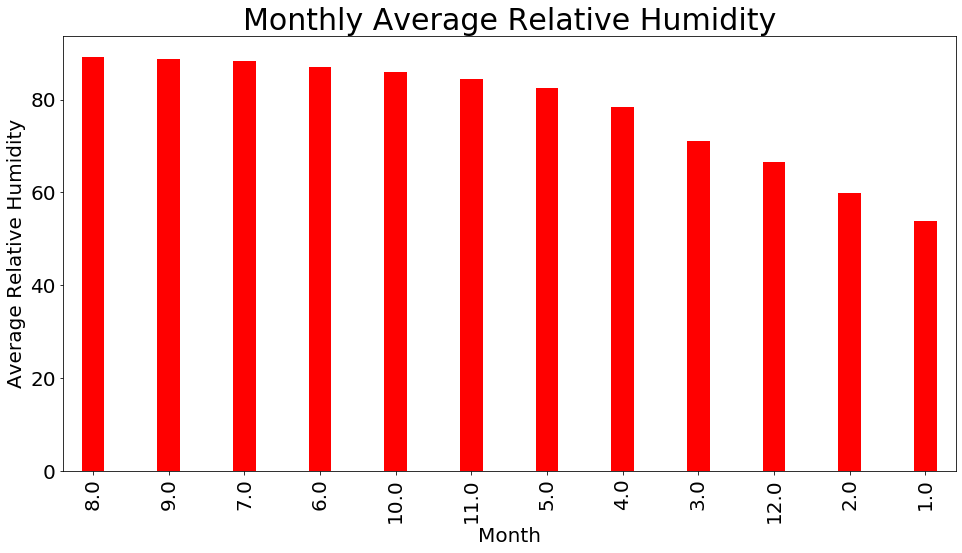

In [38]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df1 = newData.groupby('Month').mean().sort_values(by='Hourly RH',
            ascending=False)['Hourly RH'].plot(kind='bar',color='r',width=0.3,title='Monthly Average Relative Humidity',fontsize=20)
plt.ylabel('Average Relative Humidity')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print( newData.groupby('Month').mean().sort_values(by='Hourly RH',
            ascending=False)['Hourly RH'])

In [39]:
df2 = newData.groupby('Hour').sum()['Hourly RH']
df2_n = pd.DataFrame(df2)

In [40]:
df2_n['Hour'] = df2_n.index

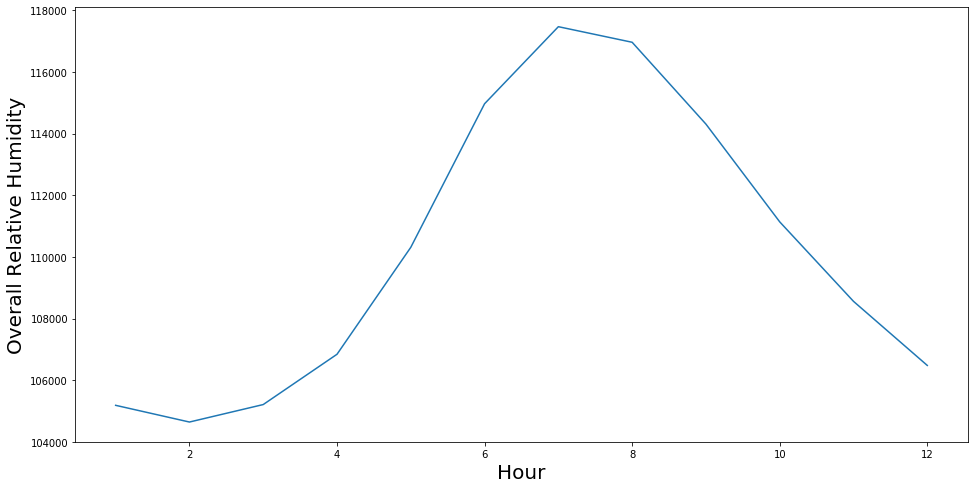

In [41]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.lineplot(x='Hour',y='Hourly RH',data=df2_n)
plt.ylabel('Overall Relative Humidity')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

Text(0, 0.5, 'Humidity')

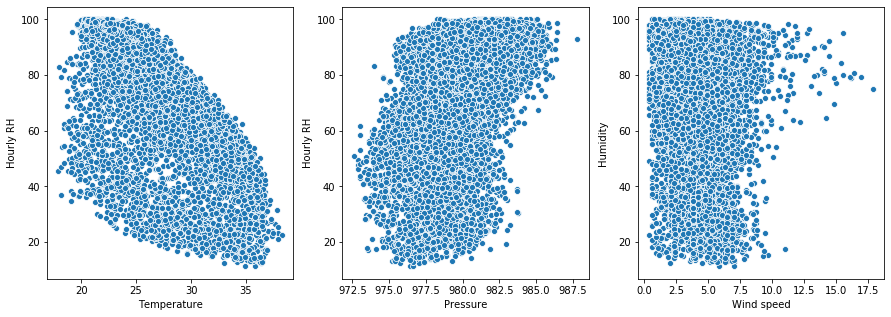

In [42]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
#Temperature with RH
sns.scatterplot(x='Temperature',y='Hourly RH',data=newData,ax=axes[0])
plt.xlabel('Temperature')
plt.ylabel('Humidity')

sns.scatterplot(x='Pressure',y='Hourly RH',data=newData,ax=axes[1])
plt.xlabel('Pressure')
plt.ylabel('Humidity')

sns.scatterplot(x='windSpeed',y='Hourly RH',data=newData,ax=axes[2])
plt.xlabel('Wind speed')
plt.ylabel('Humidity')

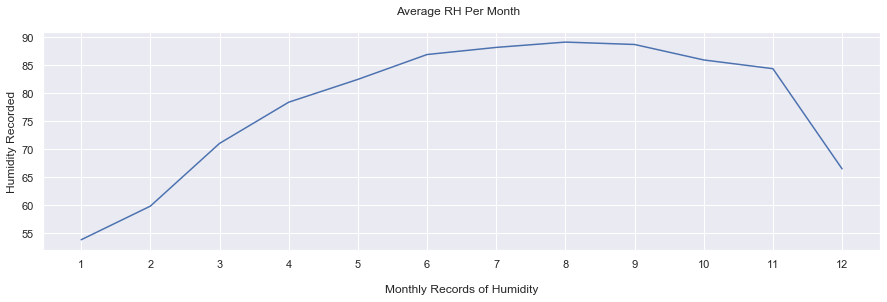

In [43]:
d1 = newData.groupby('Month').aggregate({'Hourly RH':'mean'})
d1 = d1.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Month', y='Hourly RH', data=d1)
ax.set(xticks=d1.Month.values)
plt.xlabel("\nMonthly Records of Humidity")
plt.ylabel("Humidity Recorded")
plt.title("Average RH Per Month  \n")
plt.show()

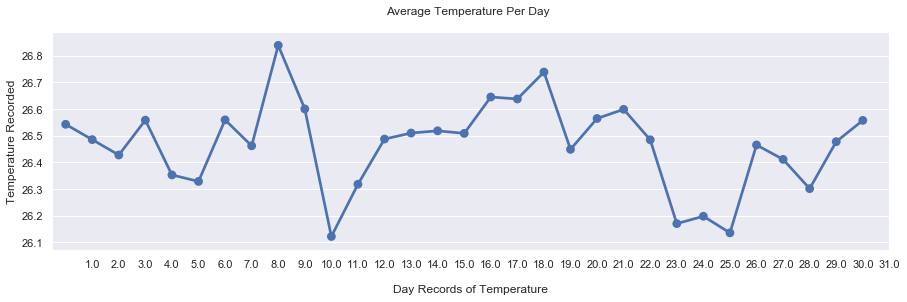

In [44]:
d2 = newData.groupby('Day').aggregate({'Temperature':'mean'})
d2 = d2.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.pointplot(x='Day', y='Temperature', data=d2)
ax.set(xticks=d2.Day.values)
plt.xlabel("\nDay Records of Temperature")
plt.ylabel("Temperature Recorded")
plt.title("Average Temperature Per Day  \n")
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [46]:
target = newData.iloc[:,-1].values
data = newData.drop('Hourly RH',axis=1)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=123)

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## Training With XGBOOST

In [49]:
import xgboost as xgb
gbm = xgb.XGBRegressor()
gbm.fit(x_train,y_train) 
xgd_predict = gbm.predict(x_test)
gbm.score(x_train,y_train)

[04:53:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.817895722806531

## Training With LIGHTBM

In [50]:
import lightgbm as lgb
lg_reg = lgb.LGBMRegressor(max_depth=10,n_estimators=1000,learning_rate=0.1)
lg_reg.fit(x_train,y_train)
lg_predict=lg_reg.predict(x_test)
lg_reg.score(x_train,y_train)

0.9747182354279561

In [51]:
lg_reg.score(x_test,y_test)

0.8876281288907253

## with RandomForesT
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
predict=rf_reg.predict(x_test)
rf_reg.score(x_train,y_train)

0.9809811887685241

In [54]:
rf_reg.score(x_test,y_test)

0.8624920311263485

MSE: 43.184070784591256
RMSE: 6.571458801863652
R2: 0.8876281288907252


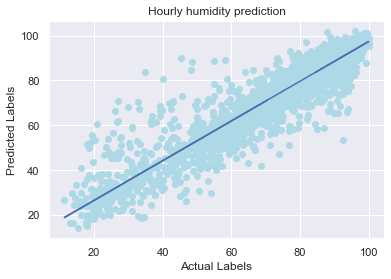

In [55]:
mse = mean_squared_error(y_test, lg_predict)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, lg_predict)
print("R2:", r2)

plt.scatter(y_test,lg_predict, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly humidity prediction')
z = np.polyfit(y_test,lg_predict, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

## Ensemble Regressor Training

In [56]:
from sklearn.ensemble import VotingRegressor

In [57]:
voting_Ref = VotingRegressor(
 estimators=[('rf' , rf_reg), ('lgbm' , lg_reg),('xgb' , gbm)])
voting_Ref. fit(x_train, y_train)

[04:54:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                     

In [58]:
for clf in (rf_reg,lg_reg,gbm,voting_Ref):
    clf.fit(x_train, y_train)
    new_pred = clf. predict(x_test)
    print(clf. __class__. __name__, r2_score(y_test, new_pred))

RandomForestRegressor 0.8623980062696353
LGBMRegressor 0.8876281288907252
[04:55:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 0.8008390870255859
[04:55:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
VotingRegressor 0.8707917998062602
